# Crop Recommendation Systems

Unsupervised Learning

Archana Ramachandran

Capstone 3


**Introduction**


 Agriculture is important and helps farmer to understand the strategies.
 This data set helps in  understanding how the suitable crops grow in particular farm based on usage of models and clustering.



**Data Setup**


In [ ]:
# Import dependencies and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

!pip install umap-learn
import umap

In [ ]:
#loading the data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/Colab Notebooks/Crop_recommendation.csv"

original_df = pd.read_csv(path)
df = original_df.copy()
df.head(n=10)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice

In [ ]:
df.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
df.shape

(2200, 8)


Feature Engineering
Data Preview
In this section we will explore, understand, and standardize the contents of the dataset

Data Cleaning

In [ ]:
column_names = list(df.columns.values)
print(column_names)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [ ]:
# Checking for nulls in DataFrame
#misssingvalues
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#describing the dataset
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

Feature Description


N - ratio of Nitrogen content in soil

P - ratio of Phosphorous content in soil

K - ratio of Potassium content in soil

temperature - temperature in degree Celsius

humidity - relative humidity in %

ph - ph value of the soil

rainfall - rainfall in mm

Label - Crop name


Feature Exploration


In [ ]:
print(df.temperature.mean(axis=0))

25.616243851779544


In [ ]:
print(df.rainfall.mean(axis=0))

103.46365541576817


Here we will trim the  Temperature and rainfall value down to two decimal points, for easier readability.

In [ ]:
print(round(df.temperature.mean(axis=0), 2))

25.62


In [ ]:
print(round(df.rainfall.mean(axis=0), 2))

103.46


In [ ]:
df.round({'temperature': 2})

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43        20.88  82.002744  6.502985  202.935536    rice
1      85  58  41        21.77  80.319644  7.038096  226.655537    rice
2      60  55  44        23.00  82.320763  7.840207  263.964248    rice
3      74  35  40        26.49  80.158363  6.980401  242.864034    rice
4      78  42  42        20.13  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32        26.77  66.413269  6.780064  177.774507  coffee
2196   99  15  27        27.42  56.636362  6.086922  127.924610  coffee
2197  118  33  30        24.13  67.225123  6.362608  173.322839  coffee
2198  117  32  34        26.27  52.127394  6.758793  127.175293  coffee
2199  104  18  30        23.60  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [ ]:
df.round({'rainfall': 2})

N   P   K  temperature   humidity        ph  rainfall   label
0      90  42  43    20.879744  82.002744  6.502985    202.94    rice
1      85  58  41    21.770462  80.319644  7.038096    226.66    rice
2      60  55  44    23.004459  82.320763  7.840207    263.96    rice
3      74  35  40    26.491096  80.158363  6.980401    242.86    rice
4      78  42  42    20.130175  81.604873  7.628473    262.72    rice
...   ...  ..  ..          ...        ...       ...       ...     ...
2195  107  34  32    26.774637  66.413269  6.780064    177.77  coffee
2196   99  15  27    27.417112  56.636362  6.086922    127.92  coffee
2197  118  33  30    24.131797  67.225123  6.362608    173.32  coffee
2198  117  32  34    26.272418  52.127394  6.758793    127.18  coffee
2199  104  18  30    23.603016  60.396475  6.779833    140.94  coffee

[2200 rows x 8 columns]

In [ ]:
grouped=df.groupby(by='label').mean().reset_index()
grouped

label       N       P       K  temperature   humidity        ph  \
0         apple   20.80  134.22  199.89    22.630942  92.333383  5.929663   
1        banana  100.23   82.01   50.05    27.376798  80.358123  5.983893   
2     blackgram   40.02   67.47   19.24    29.973340  65.118426  7.133952   
3      chickpea   40.09   67.79   79.92    18.872847  16.860439  7.336957   
4       coconut   21.98   16.93   30.59    27.409892  94.844272  5.976562   
5        coffee  101.20   28.74   29.94    25.540477  58.869846  6.790308   
6        cotton  117.77   46.24   19.56    23.988958  79.843474  6.912675   
7        grapes   23.18  132.53  200.11    23.849575  81.875228  6.025937   
8          jute   78.40   46.86   39.99    24.958376  79.639864  6.732778   
9   kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
10       lentil   18.77   68.36   19.41    24.509052  64.804785  6.927932   
11        maize   77.76   48.44   19.79    22.389204  65.092249  6.245190   
12        mango   20.07   27.18   29.92    31.208770  50.156573  5.766373   
13    mothbeans   21.44   48.01   20.23    28.194920  53.160418  6.831174   
14     mungbean   20.99   47.28   19.87    28.525775  85.499975  6.723957   
15    muskmelon  100.32   17.72   50.08    28.663066  92.342802  6.358805   
16       orange   19.58   16.55   10.01    22.765725  92.170209  7.016957   
17       papaya   49.88   59.05   50.04    33.723859  92.403388  6.741442   
18   pigeonpeas   20.73   67.73   20.29    27.741762  48.061633  5.794175   
19  pomegranate   18.87   18.75   40.21    21.837842  90.125504  6.429172   
20         rice   79.89   47.58   39.87    23.689332  82.272822  6.425471   
21   watermelon   99.42   17.00   50.22    25.591767  85.160375  6.495778   

      rainfall  
0   112.654779  
1   104.626980  
2    67.884151  
3    80.058977  
4   175.686646  
5   158.066295  
6    80.398043  
7    69.611829  
8   174.792798  
9   105.919778  
10   45.680454  
11   84.766988  
12   94.704515  
13   51.198487  
14   48.403601  
15   24.689952  
16  110.474969  
17  142.627839  
18  149.457564  
19  107.528442  
20  236.181114  
21   50.786219

preview the unique values of the dataset.

In [ ]:
df.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
unique_vals = {}
unique_vals['N'] = df.N.unique().tolist()
unique_vals['P'] = df.P.unique().tolist()
unique_vals['K'] = df.K.unique().tolist()
unique_vals['humidity'] = df.humidity.unique().tolist()
unique_vals['ph'] = df.ph.unique().tolist()
unique_vals['rainfall'] = df.rainfall.unique().tolist()
unique_vals['label'] = df.label.unique().tolist()

In [ ]:
# Number of unique values in each feature
for key, value in unique_vals.items():
    print(key,':', len([item for item in value if item]))

N : 136
P : 117
K : 73
humidity : 2200
ph : 2200
rainfall : 2200
label : 22


EDA

we can look for comparsion top 5 most and least crops based on label

In [ ]:
#Comparsion between most and least  based on Label
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops;')
    for j,k in grouped.sort_values(by=i, ascending=False)[:5][['label',i]].values:
        print(f'{j} -->{k}')
    print(f'------------------------')

Top 5 Most N requiring crops;
cotton -->117.77
coffee -->101.2
muskmelon -->100.32
banana -->100.23
watermelon -->99.42
------------------------
Top 5 Most P requiring crops;
apple -->134.22
grapes -->132.53
banana -->82.01
lentil -->68.36
chickpea -->67.79
------------------------
Top 5 Most K requiring crops;
grapes -->200.11
apple -->199.89
chickpea -->79.92
watermelon -->50.22
muskmelon -->50.08
------------------------
Top 5 Most temperature requiring crops;
papaya -->33.7238587388
mango -->31.2087701513
blackgram -->29.9733396789
muskmelon -->28.663065756
mungbean -->28.5257747353
------------------------
Top 5 Most humidity requiring crops;
coconut -->94.84427180610001
papaya -->92.4033876826
muskmelon -->92.34280196089999
apple -->92.3333828756
orange -->92.17020876340001
------------------------
Top 5 Most ph requiring crops;
chickpea -->7.33695662374
blackgram -->7.13395162948
orange -->7.01695745276
lentil -->6.927931571609999
cotton -->6.91267549578
------------------------

In [ ]:
for i in grouped.columns[1:]:
    print(f'Top 5 least {i} requiring crops:')
    for j,k in grouped.sort_values(by=i)[:5][['label',i]].values:
        print(f'{j} -->{k}')
    print(f'-------------------------')

Top 5 least N requiring crops:
lentil -->18.77
pomegranate -->18.87
orange -->19.58
mango -->20.07
pigeonpeas -->20.73
-------------------------
Top 5 least P requiring crops:
orange -->16.55
coconut -->16.93
watermelon -->17.0
muskmelon -->17.72
pomegranate -->18.75
-------------------------
Top 5 least K requiring crops:
orange -->10.01
blackgram -->19.24
lentil -->19.41
cotton -->19.56
maize -->19.79
-------------------------
Top 5 least temperature requiring crops:
chickpea -->18.8728467519
kidneybeans -->20.1150846851
pomegranate -->21.837841721999997
maize -->22.3892039102
apple -->22.6309424132
-------------------------
Top 5 least humidity requiring crops:
chickpea -->16.8604394237
kidneybeans -->21.6053567295
pigeonpeas -->48.0616330847
mango -->50.1565726953
mothbeans -->53.16041802790001
-------------------------
Top 5 least ph requiring crops:
kidneybeans -->5.749410585870001
mango -->5.766372799660001
pigeonpeas -->5.794174879790001
apple -->5.929662931809999
coconut -->5.

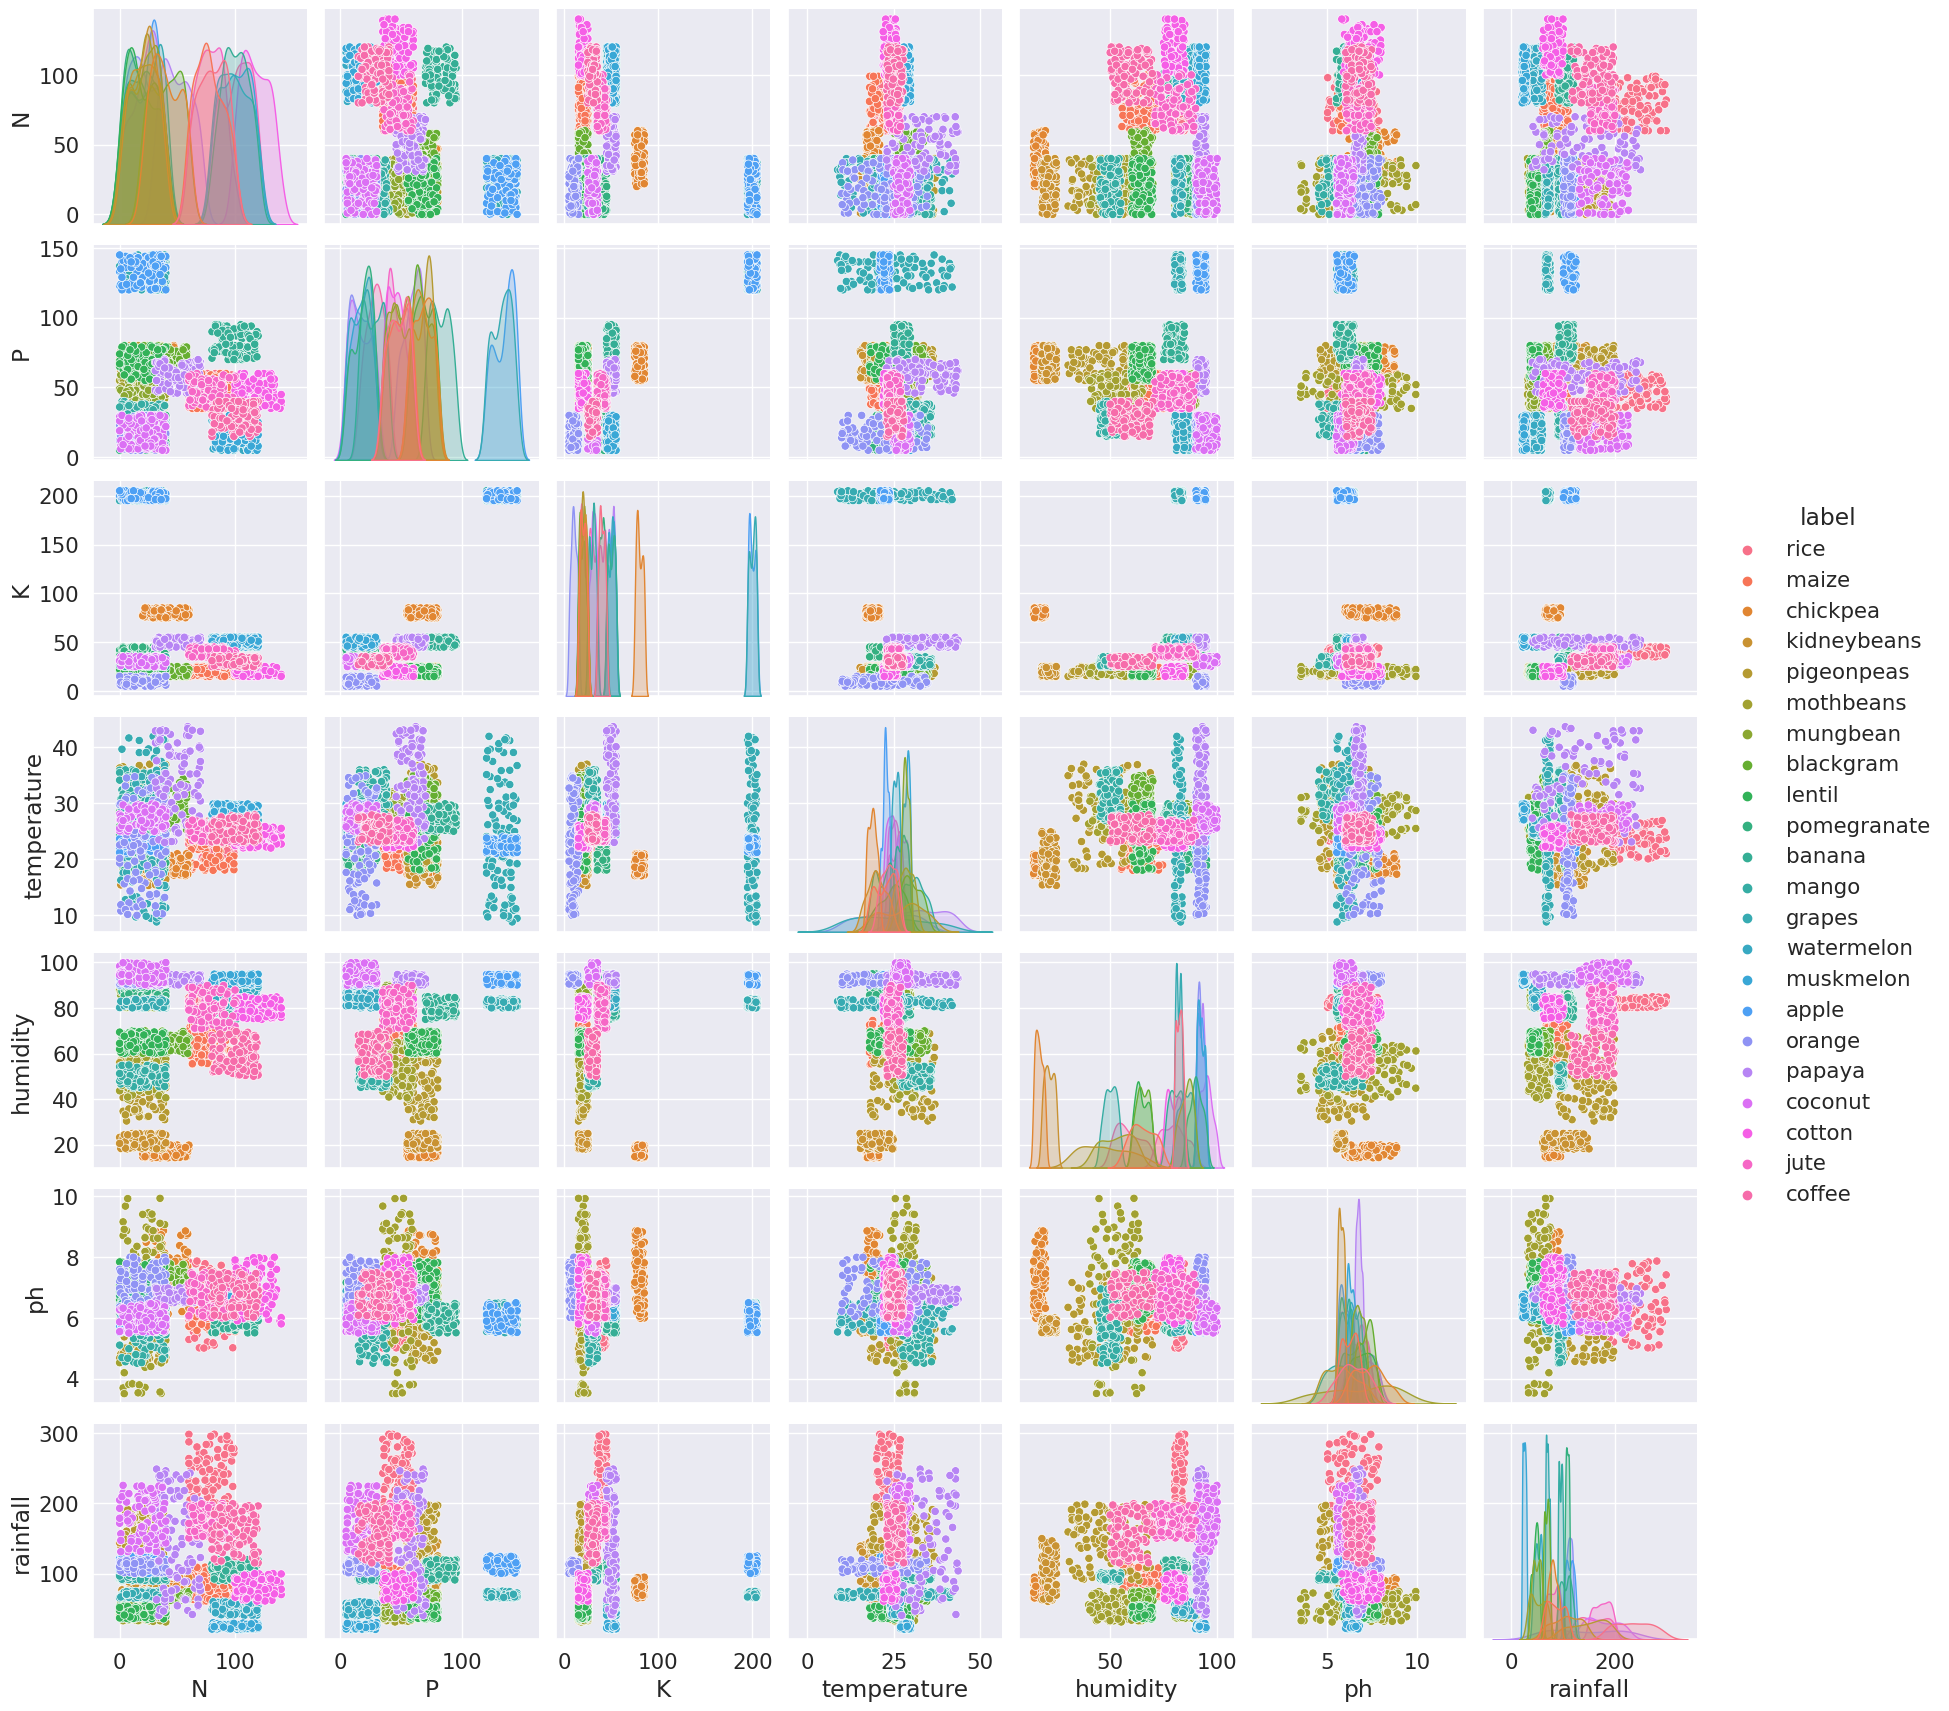

In [ ]:
sns.pairplot(data=df,hue='label')
plt.show()

In [ ]:
df_mean = pd.pivot_table(df,index=['label'],aggfunc='mean')


In [ ]:
number_of_colors = 16

col_arr = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

In [ ]:
# Phosporous
phos_summary = df_mean.sort_values(by='P',ascending=False)

fig = make_subplots(rows=1, cols=2)

top_10 = { 'y': phos_summary['P'][0:10].sort_values().index,
           'x': phos_summary['P'][0:10].sort_values()
         }

last_10 = { 'y': phos_summary['P'][-10:].sort_values().index,
           'x': phos_summary['P'][-10:].sort_values()
         }

fig.add_trace(
                go.Bar( top_10,
                       marker_color= random.choice(col_arr),
                       name = 'Most Phosporus Required',
                       orientation = 'h',
                       text = top_10['x']
                      ),
                row=1, col=1
             )

fig.add_trace(
                go.Bar( last_10,
                       marker_color= random.choice(col_arr),
                       name = 'Least Phosporus Required',
                       orientation = 'h',
                       text = last_10['x']
                      ),
                row=1, col=2
             )

fig.update_traces(texttemplate='%{text}',textposition='inside')
fig.update_layout(title='Phosporus',font_size=12)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# Potassium
Potassium_summary = df_mean.sort_values(by='P',ascending=False)

fig = make_subplots(rows=1, cols=2)

top_10 = { 'y': Potassium_summary['K'][0:10].sort_values().index,
           'x': Potassium_summary['K'][0:10].sort_values()
         }

last_10 = { 'y': Potassium_summary['K'][-10:].sort_values().index,
           'x': Potassium_summary['K'][-10:].sort_values()
         }

fig.add_trace(
                go.Bar( top_10,
                       marker_color= random.choice(col_arr),
                       name = 'Most Potassium Required',
                       orientation = 'h',
                       text = top_10['x']
                      ),
                row=1, col=1
             )

fig.add_trace(
                go.Bar( last_10,
                       marker_color= random.choice(col_arr),
                       name = 'Least Potassium Required',
                       orientation = 'h',
                       text = last_10['x']
                      ),
                row=1, col=2
             )

fig.update_traces(texttemplate='%{text}',textposition='inside')
fig.update_layout(title='Potassium',font_size=12)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace( go.Bar( x = df_mean.index,
                       y = df_mean['N'],
                      marker_color = 'brown',
                      name = 'Nitrogen'
                     )
             )

fig.add_trace( go.Bar( x = df_mean.index,
                       y = df_mean['P'],
                      marker_color = 'red',
                      name = 'Phosphorous'
                     )
             )

fig.add_trace( go.Bar( x = df_mean.index,
                       y = df_mean['K'],
                      marker_color = 'yellow',
                      name = 'Potassium'
                     )
             )
fig.update_layout(title='Comparison between different compounds')

In [ ]:
fig = px.scatter( x = df['temperature'],
                       y = df['rainfall'],
                      color = df['label'])
fig.update_layout(title='Rainfall by temperature')
fig.show()

We can now look at the correlation matrix of the numerical features.

<ipython-input-30-91f335cc6d43>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-30-91f335cc6d43>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



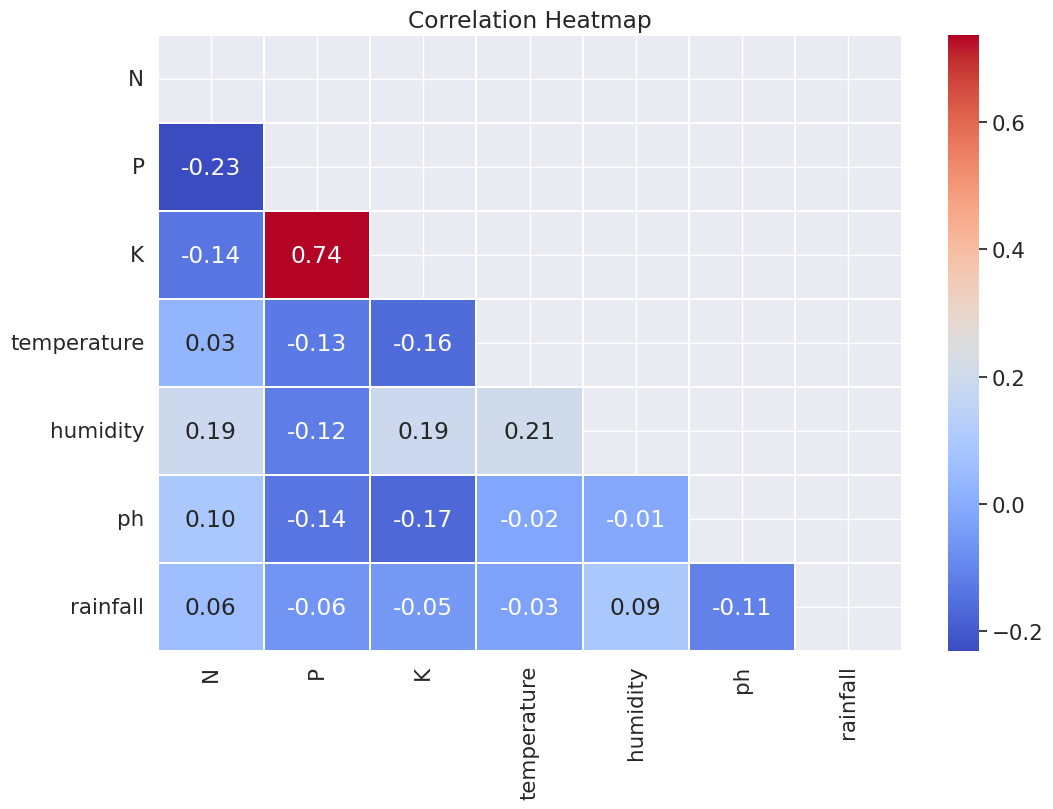

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Changing the matrix shape to remove redundant data
matrix = np.triu(df.corr())

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05, mask=matrix)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Correlation relationships betweeen K vs P and  Rainfall Vs humidity

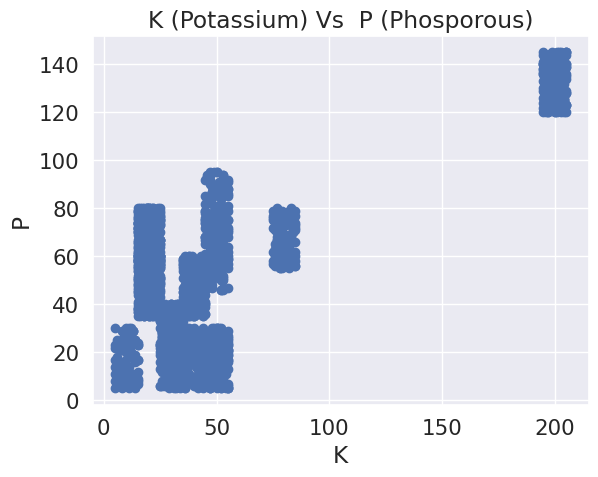

In [ ]:
x = df.K
y = df.P

plt.scatter(x, y)
plt.title("K (Potassium) Vs  P (Phosporous)")
plt.xlabel("K")
plt.ylabel("P")
plt.show()

Strong correlation between K and P.

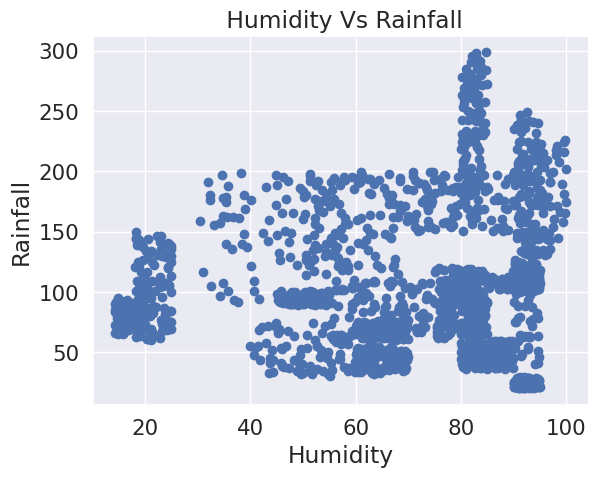

In [ ]:
x = df.humidity
y = df.rainfall

plt.scatter(x, y)
plt.title(" Humidity Vs Rainfall")
plt.xlabel("Humidity")
plt.ylabel("Rainfall")
plt.show()

In [ ]:
above_100 = df[df["K"] > 100]

In [ ]:
above_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1200 to 1599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            200 non-null    int64  
 1   P            200 non-null    int64  
 2   K            200 non-null    int64  
 3   temperature  200 non-null    float64
 4   humidity     200 non-null    float64
 5   ph           200 non-null    float64
 6   rainfall     200 non-null    float64
 7   label        200 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 14.1+ KB


In [ ]:
print(above_100.P)

1200    130
1201    144
1202    123
1203    125
1204    131
       ... 
1595    120
1596    132
1597    137
1598    144
1599    140
Name: P, Length: 200, dtype: int64


In [ ]:
print(above_100.K)

1200    195
1201    204
1202    205
1203    196
1204    196
       ... 
1595    197
1596    198
1597    196
1598    196
1599    197
Name: K, Length: 200, dtype: int64


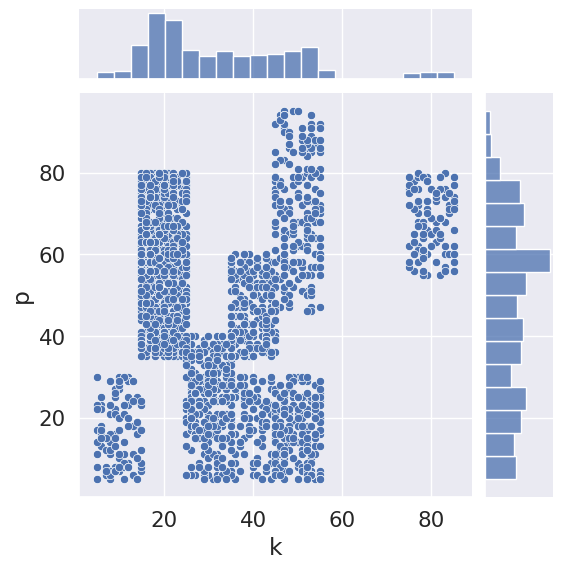

In [ ]:
below_100 = df[df["K"] < 100]

x = below_100.K
y = below_100.P

ax = sns.jointplot(x=x, y=y, data = below_100)
ax.set_axis_labels("k", "p")

In [ ]:
df.head(100)

N   P   K  temperature   humidity        ph    rainfall label
0   90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1   85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2   60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3   74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4   78  42  42    20.130175  81.604873  7.628473  262.717340  rice
..  ..  ..  ..          ...        ...       ...         ...   ...
95  88  46  42    22.683191  83.463583  6.604993  194.265172  rice
96  93  47  37    21.533463  82.140041  6.500343  295.924880  rice
97  60  55  45    21.408658  83.329319  5.935745  287.576694  rice
98  78  35  44    26.543481  84.673536  7.072656  183.622266  rice
99  65  37  40    23.359054  83.595123  5.333323  188.413665  rice

[100 rows x 8 columns]

In [ ]:
print(below_100.P)

0       42
1       58
2       55
3       35
4       42
        ..
2195    34
2196    15
2197    33
2198    32
2199    18
Name: P, Length: 2000, dtype: int64


In [ ]:
print(below_100.K)

0       43
1       41
2       44
3       40
4       42
        ..
2195    32
2196    27
2197    30
2198    34
2199    30
Name: K, Length: 2000, dtype: int64


Next let's inspect the second relationship indicated by the heatmap: 'Rainfall' vs. 'Humidity'.

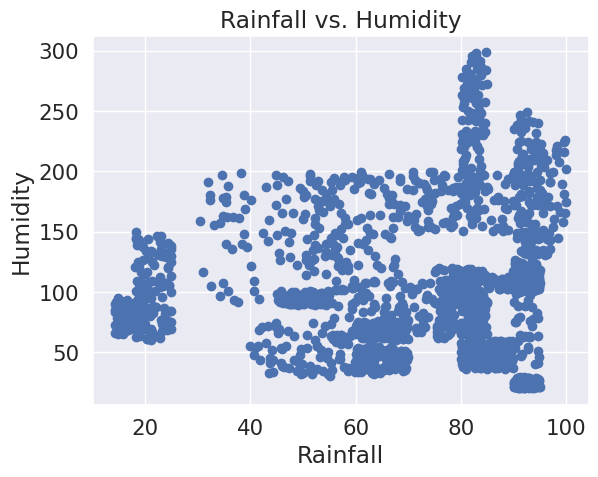

In [ ]:
x = df.humidity
y = df.rainfall

plt.scatter(x, y)
plt.title("Rainfall vs. Humidity")
plt.xlabel("Rainfall")
plt.ylabel("Humidity")
plt.show()


It is difficult to make any conclusions about this relationship based on this graph. There are some extreme values represented here. The two potential outliers exist beyond 300 humidity

Text(1, 5, 'R² = 0.00')

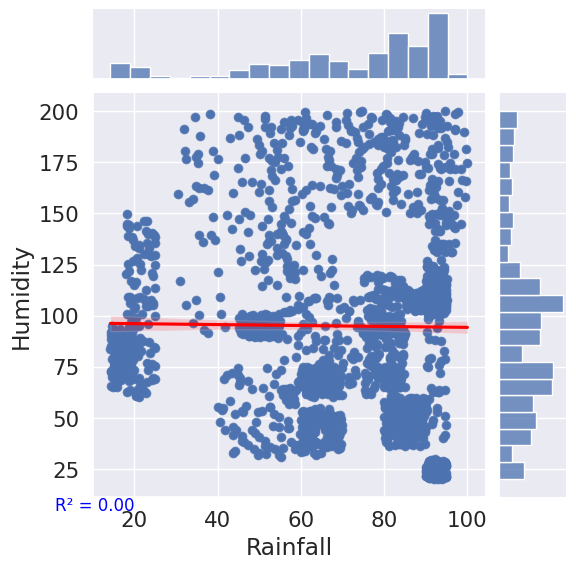

In [ ]:
from scipy import stats
below_200 = df[df["rainfall"] < 200]

x = below_200.humidity
y = below_200.rainfall

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

ax = sns.jointplot(x=x, y=y, data = below_200)
sns.regplot(x=x, y=y, data= below_200, ci=95, line_kws={"color": "red"})
ax.set_axis_labels("Rainfall", "Humidity")
plt.text(1, 5, f'R² = {r_squared:.2f}', fontsize=12, color='blue')

Text(1, 5, 'R² = 0.21')

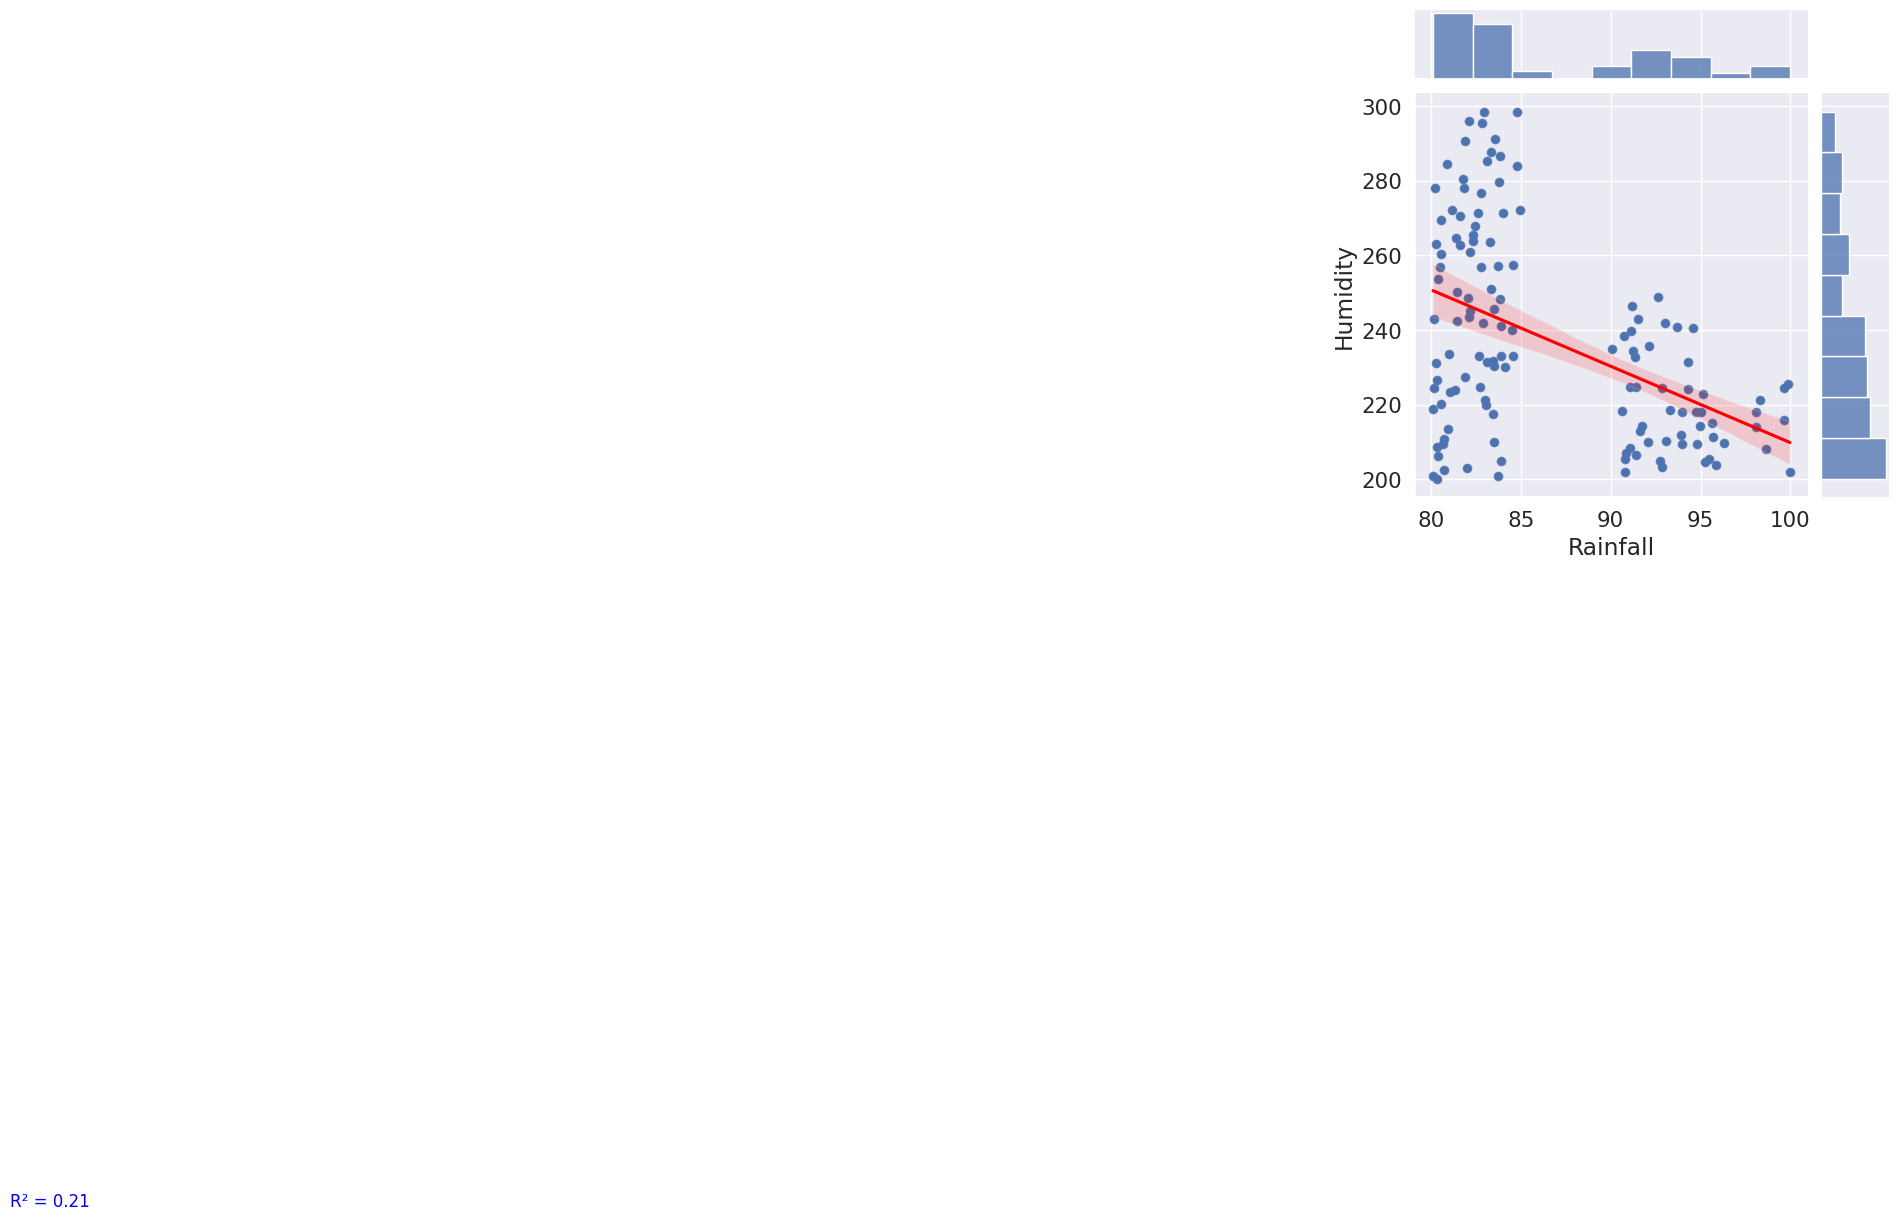

In [ ]:
from scipy import stats
above_200 = df[df["rainfall"] > 200]

x = above_200.humidity
y = above_200.rainfall

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

ax = sns.jointplot(x=x, y=y, data = above_200)
sns.regplot(x=x, y=y, data= above_200, ci=95, line_kws={"color": "red"})
ax.set_axis_labels("Rainfall", "Humidity")
plt.text(1, 5, f'R² = {r_squared:.2f}', fontsize=12, color='blue')

lets Explore more for visuals

<Axes: xlabel='temperature', ylabel='label'>

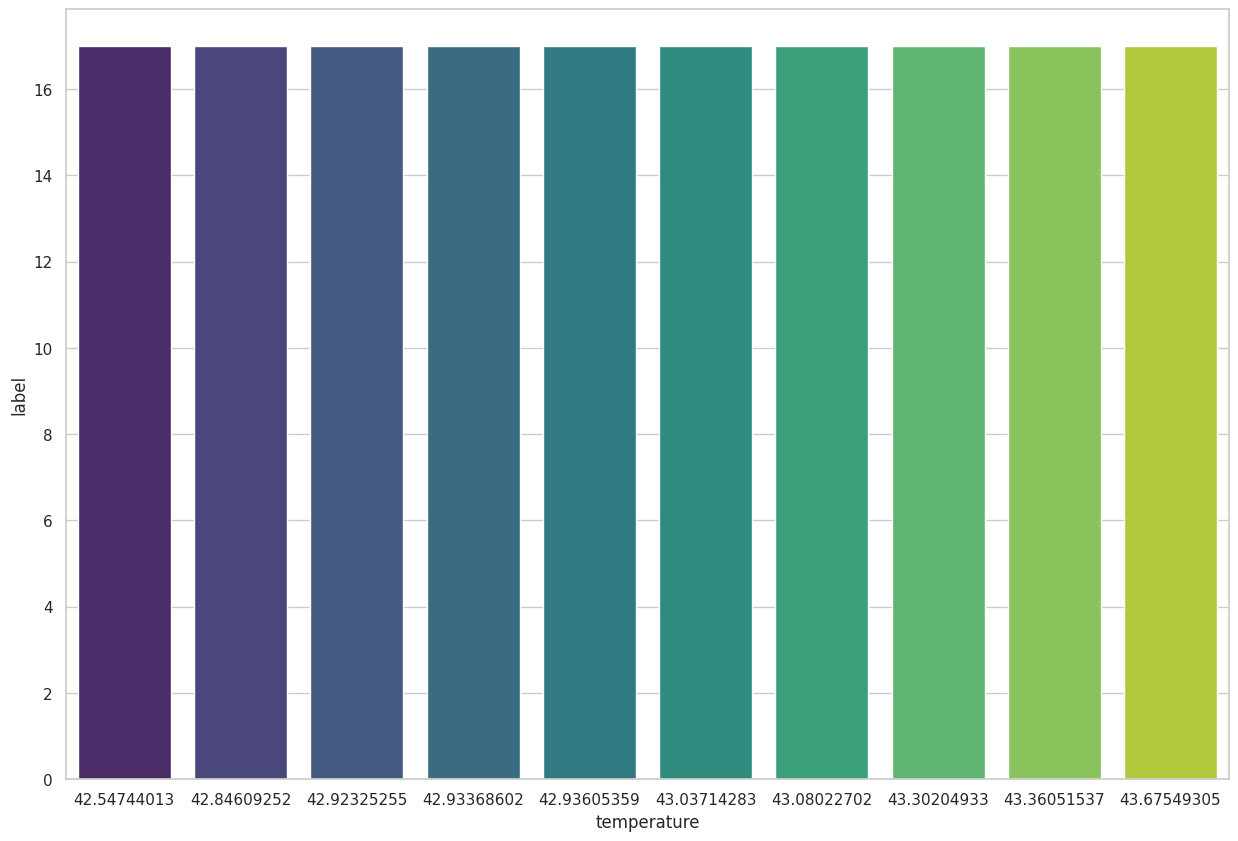

In [ ]:
Most_temperature = df.sort_values('temperature', ascending = False).head(10).set_index('label')
plt.figure(figsize=(15,10))
sns.barplot(x=Most_temperature['temperature'], y=Most_temperature.index, palette = 'viridis')

<Axes: xlabel='rainfall', ylabel='label'>

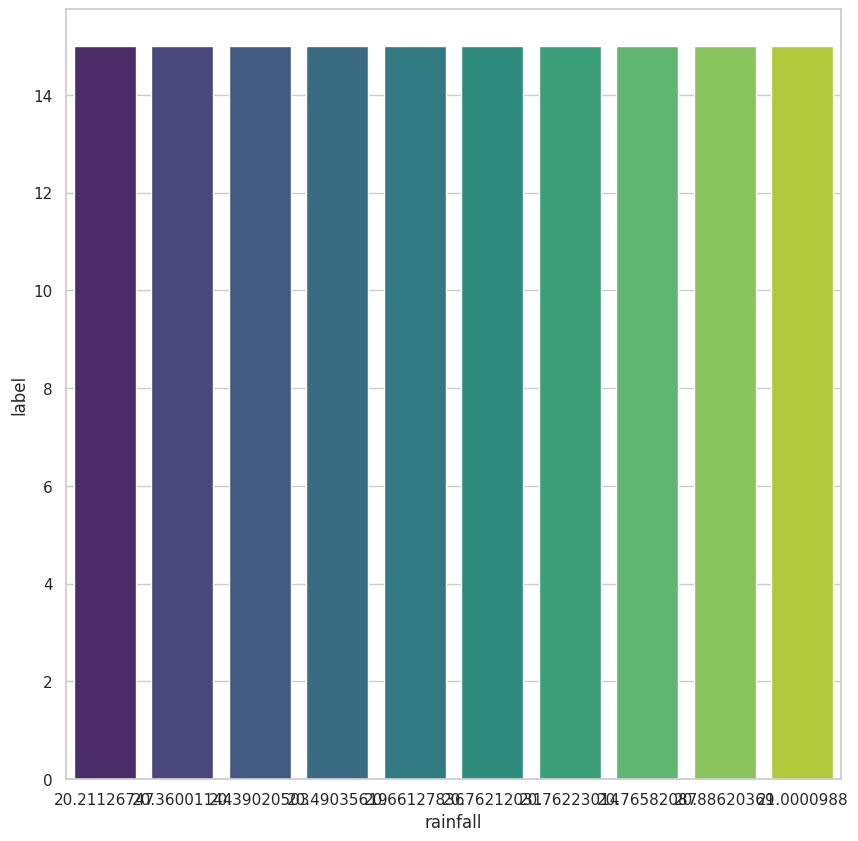

In [ ]:
Most_rainfall = df.sort_values('rainfall', ascending = True).head(10).set_index('label')
plt.figure(figsize=(10,10))
sns.barplot(x=Most_rainfall['rainfall'], y=Most_rainfall.index, palette = 'viridis')

<Axes: xlabel='humidity', ylabel='label'>

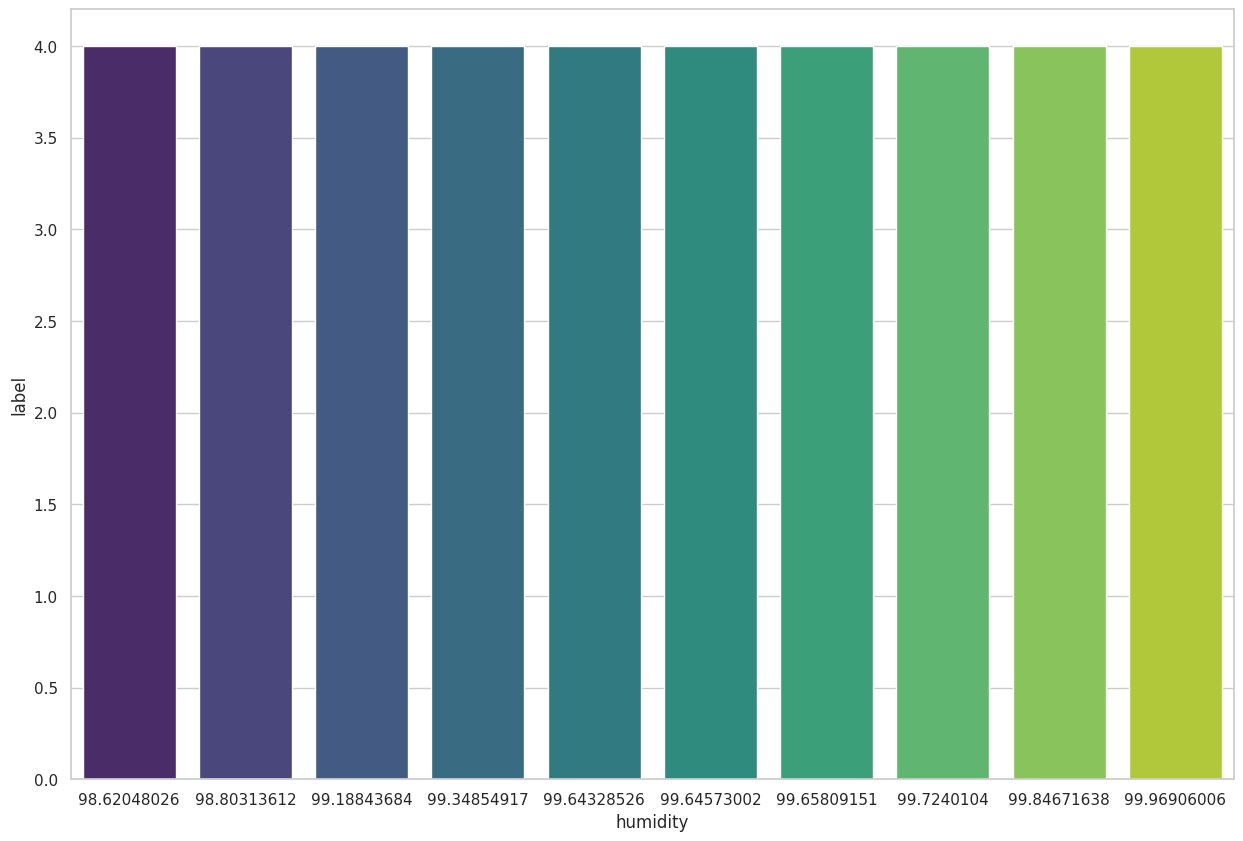

In [ ]:
Most_humidity = df.sort_values('humidity', ascending = False).head(10).set_index('label')
plt.figure(figsize=(15,10))
sns.barplot(x=Most_humidity['humidity'], y=Most_humidity.index, palette = 'viridis')

            label    rainfall
rice          100  236.181114
maize         100   84.766988
jute          100  174.792798
cotton        100   80.398043
coconut       100  175.686646
papaya        100  142.627839
orange        100  110.474969
apple         100  112.654779
muskmelon     100   24.689952
watermelon    100   50.786219


Text(0.5, 1.0, 'Top Ten Crops')

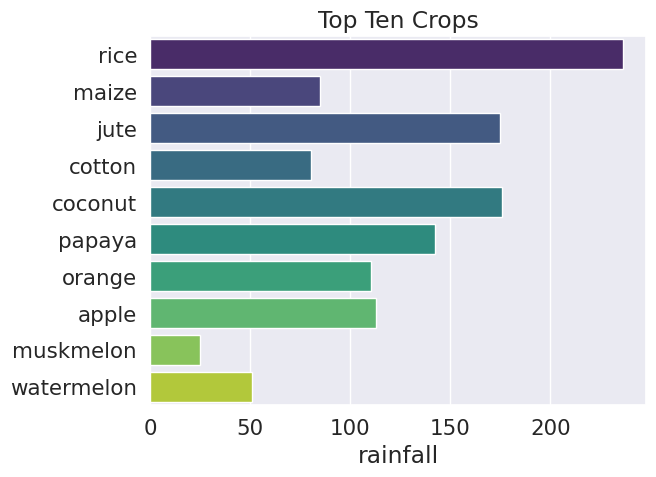

In [ ]:
#Lets check with Top most crops with most rainfall
Top_crops = (df['label'].value_counts()).iloc[:10]
Top_crops = Top_crops.sort_values(ascending=False)

top_10_crops = df['label'].value_counts().head(10).index.tolist()
filtered_df = df[df['label'].isin(top_10_crops)]
rainfall = filtered_df.groupby('label')['rainfall'].mean()


Most_rainfall = pd.concat([Top_crops, rainfall], axis=1)

print(Most_rainfall)

sns.barplot(x=Most_rainfall['rainfall'], y=Most_rainfall.index, palette = 'viridis')

plt.title('Top Ten Crops')

Unsupervised Learning Models
We will try three unsupervised learning models to see which one would be most effective for providing crop recommendations. We will employ visual analysis and the Silhouette score to determine the best possible model.

The three models tested will be K-Means, Hierarchical Clustering, and UMAP.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

!pip install umap-learn
import umap

Data Preprocessing


In [ ]:
df1=df.copy()

for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column + '_encoded'] = df1[column].astype('category').cat.codes
        df1.drop(column, axis=1, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N              2200 non-null   int64  
 1   P              2200 non-null   int64  
 2   K              2200 non-null   int64  
 3   temperature    2200 non-null   float64
 4   humidity       2200 non-null   float64
 5   ph             2200 non-null   float64
 6   rainfall       2200 non-null   float64
 7   label_encoded  2200 non-null   int8   
dtypes: float64(4), int64(3), int8(1)
memory usage: 122.6 KB


In [ ]:

df1 = df1.drop("label_encoded", axis = 1)


df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


In [ ]:
print((df1.isnull().sum() / len(df1)) * 100)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
dtype: float64


In [ ]:
print((df1.isnull().sum() / len(df1)) * 100)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
dtype: float64


In [ ]:
names=df['label'].unique()
encoder =LabelEncoder()
df['label']=encoder.fit_transform(df['label'])
df.head()

N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20
4  78  42  42    20.130175  81.604873  7.628473  262.717340     20

In [ ]:
ss=StandardScaler()
X = pd.DataFrame(ss.fit_transform(df1), columns=df1.columns)

In [ ]:

# You just want the first two principal components
pca = PCA(n_components=2)

# Get the components by
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X)

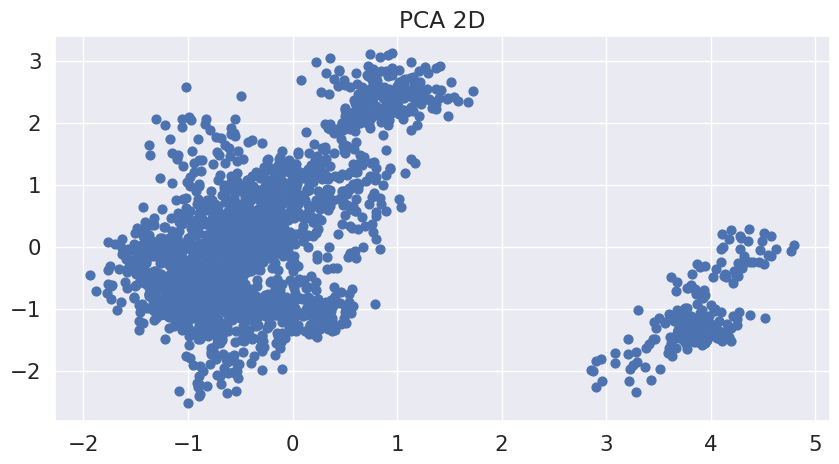

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], s=40)
plt.title('PCA 2D')
plt.axis('on')
plt.show()

In [ ]:
k_val = list()
sse = list()
for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, random_state=123, n_init=10).fit(X)
    k_val.append(i)
    sse.append(kmeans.inertia_)

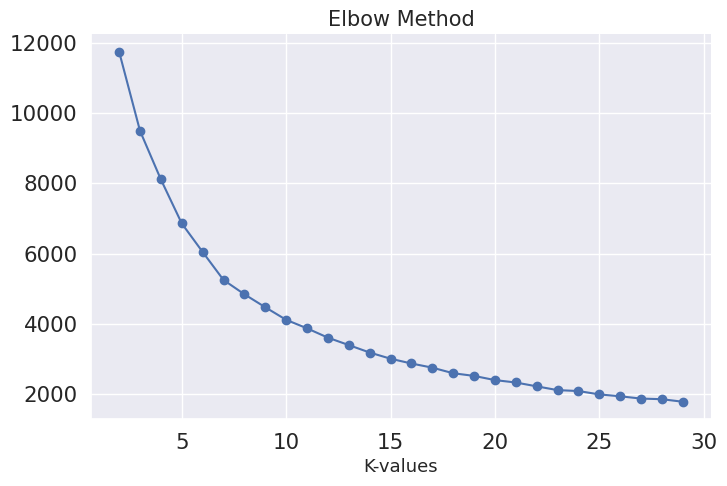

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(k_val, sse)
ax.scatter(k_val, sse, c='b')

ax.set_title('Elbow Method', fontsize=15)
ax.set_xlabel('K-values', fontsize=13)


ax.spines[['top', 'right']].set_visible(False)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



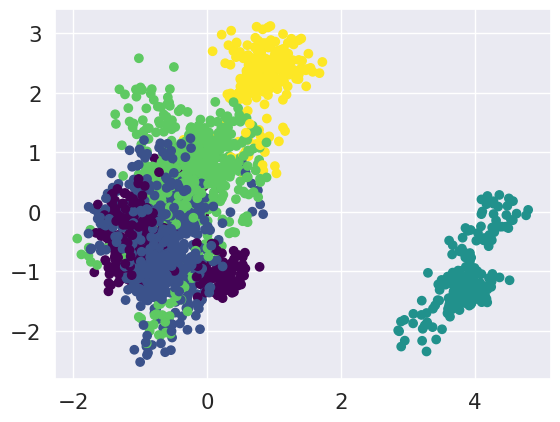

In [ ]:
# Reduce it to two components for visualization
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=0).fit_predict(X)
labels = kmeans.labels_

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
plt.show()

In [ ]:
# Identify outliers and remove them
df1.idxmax()

N              1912
P              1211
K              1202
temperature    1743
humidity       1889
ph              594
rainfall         43
dtype: int64

In [ ]:
df.drop(1211, inplace = True)
df.drop(1202, inplace = True)
df.drop(1889, inplace = True)
df.drop(43, inplace = True)

In [ ]:
ss=StandardScaler()
X = pd.DataFrame(ss.fit_transform(df), columns=df.columns)


# You just want the first two principal components
pca = PCA(n_components=2)

# Get the components by
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X)

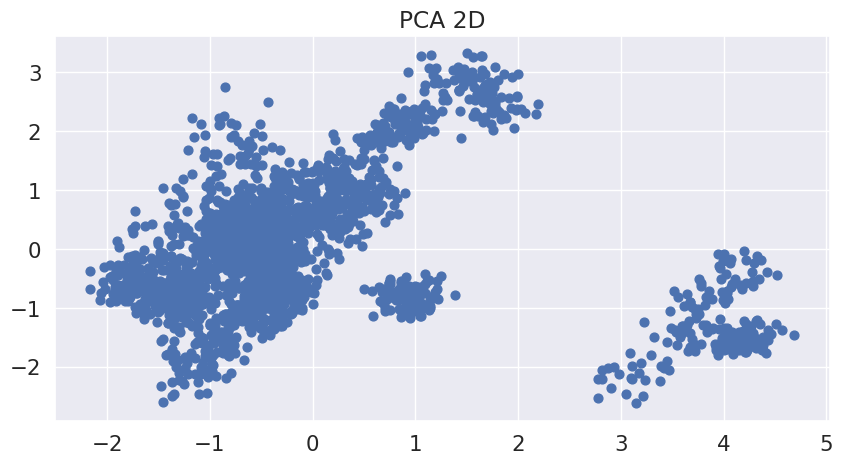

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], s=40)
plt.title('PCA 2D')
plt.axis('on')
plt.show()

In [ ]:
k_val = list()
sse = list()
for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, random_state=123, n_init=10).fit(X)
    k_val.append(i)
    sse.append(kmeans.inertia_)

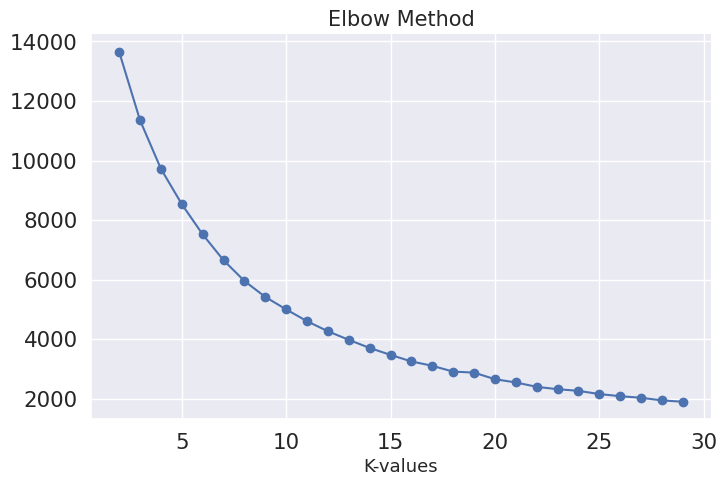

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(k_val, sse)
ax.scatter(k_val, sse, c='b')

ax.set_title('Elbow Method', fontsize=15)
ax.set_xlabel('K-values', fontsize=13)


ax.spines[['top', 'right']].set_visible(False)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



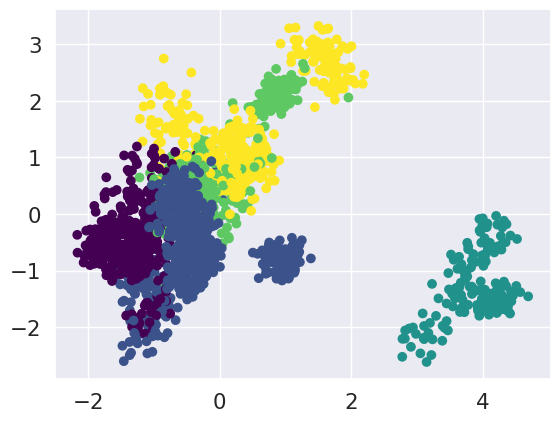

In [ ]:
# Reduce it to two components for visualization
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=0).fit_predict(X)
labels = kmeans.labels_

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
plt.show()

In [ ]:
labels = KMeans(n_clusters=3, random_state=123).fit_predict(X)
print(metrics.silhouette_score(X, labels, metric='euclidean'))
agg_kmeans = metrics.silhouette_score(X, labels, metric='euclidean')

sil_scores = {}
sil_scores['KMeans'] = agg_kmeans
print(sil_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0.22684585725733183
{'KMeans': 0.22684585725733183}


We can see that the K-means method does not have visually notable clusters. Additionally, the silhouette score for this method is very low, at 0.2268. Let's next attempt the Hierachical Clustering.

## Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Standardize the data.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

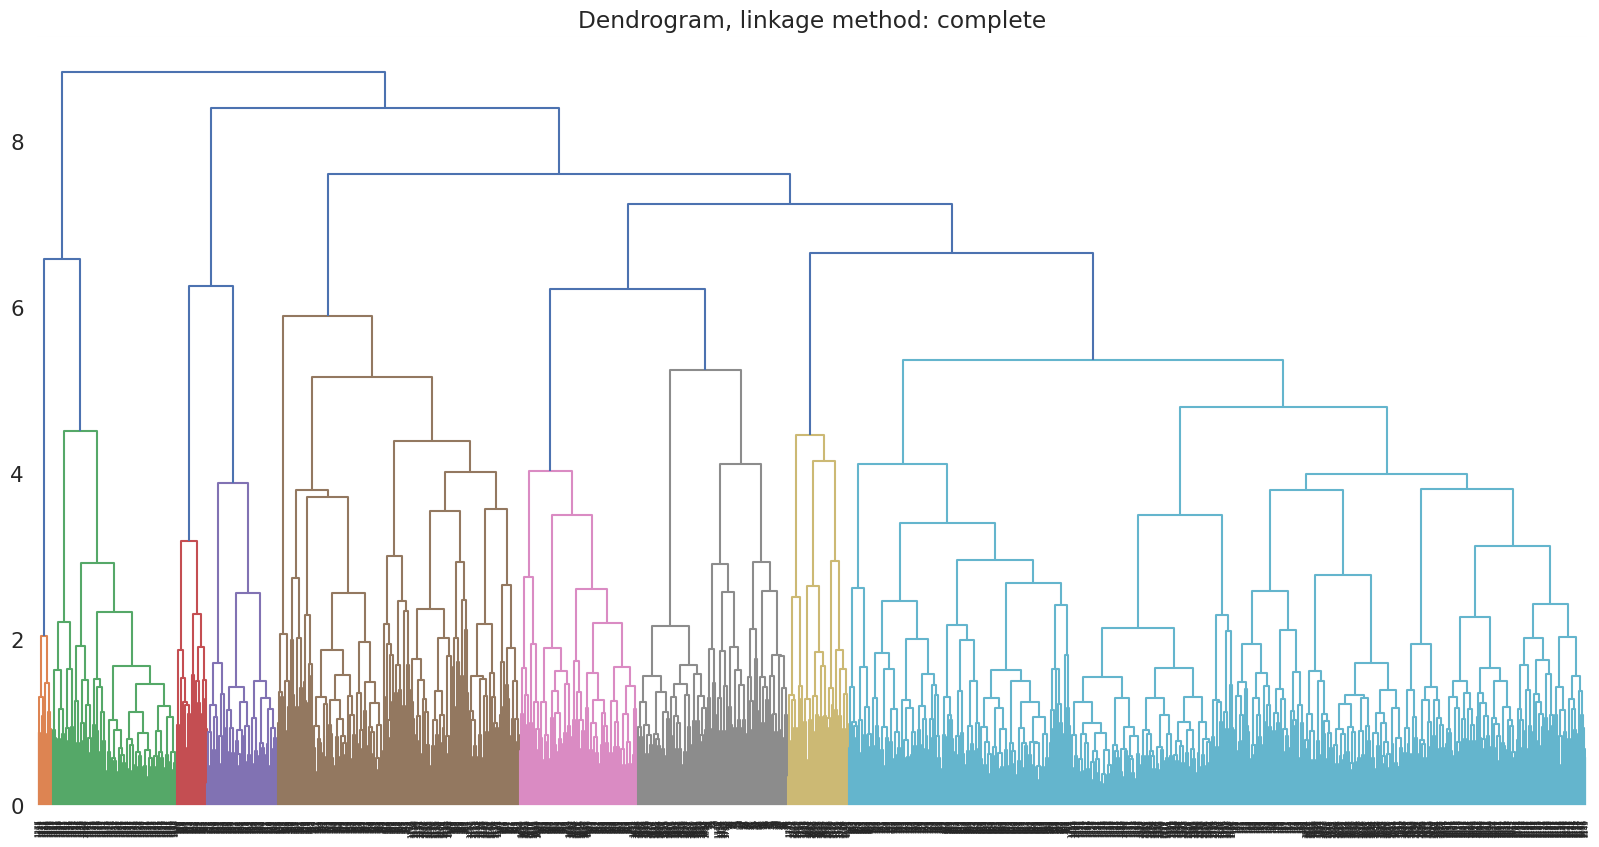

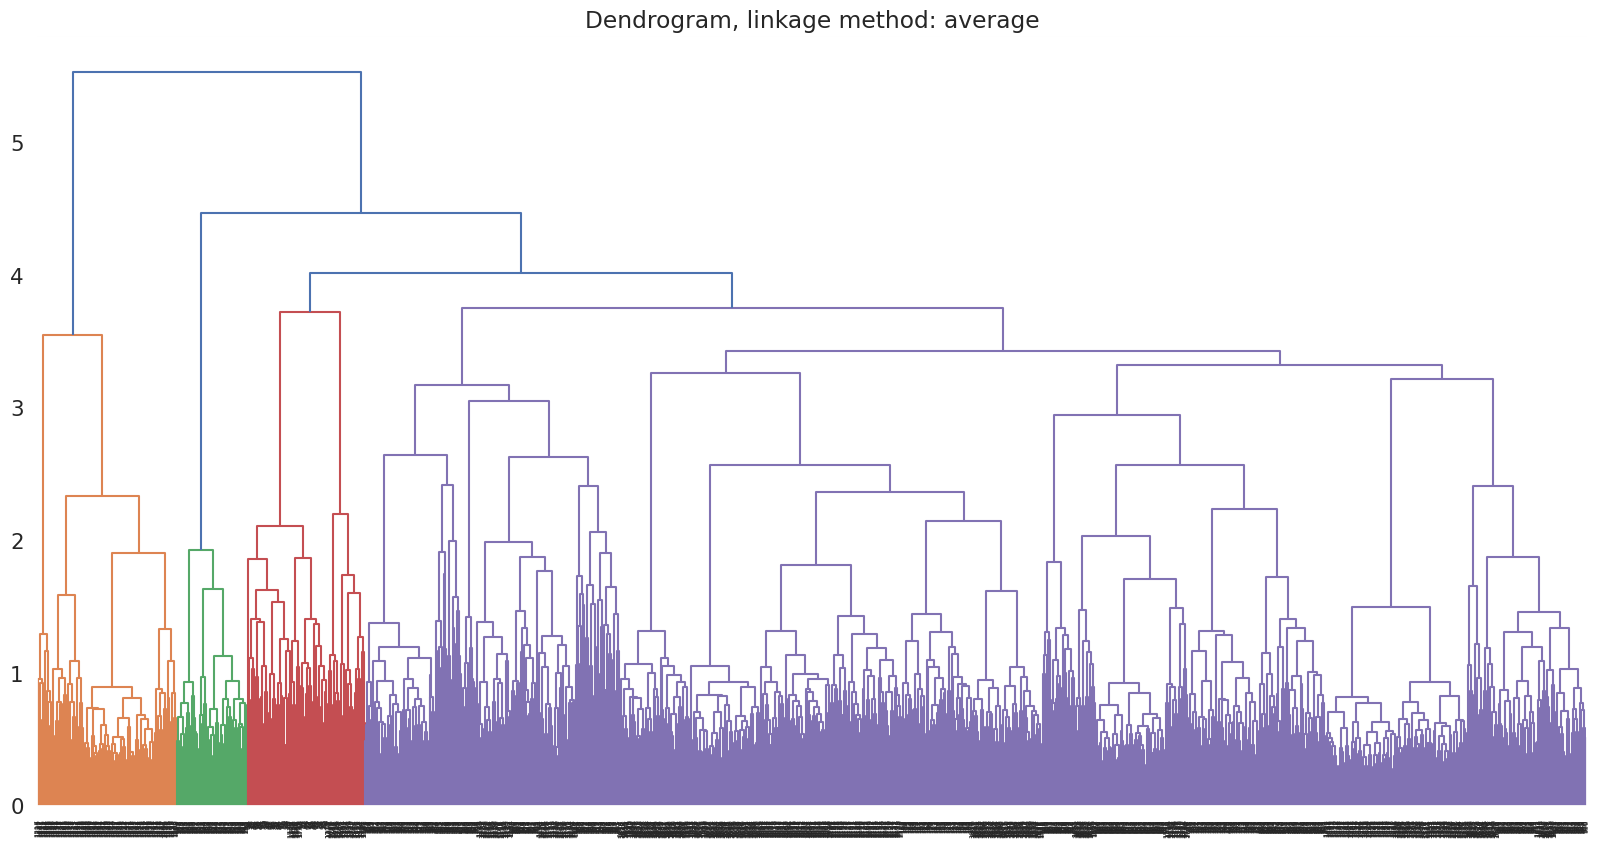

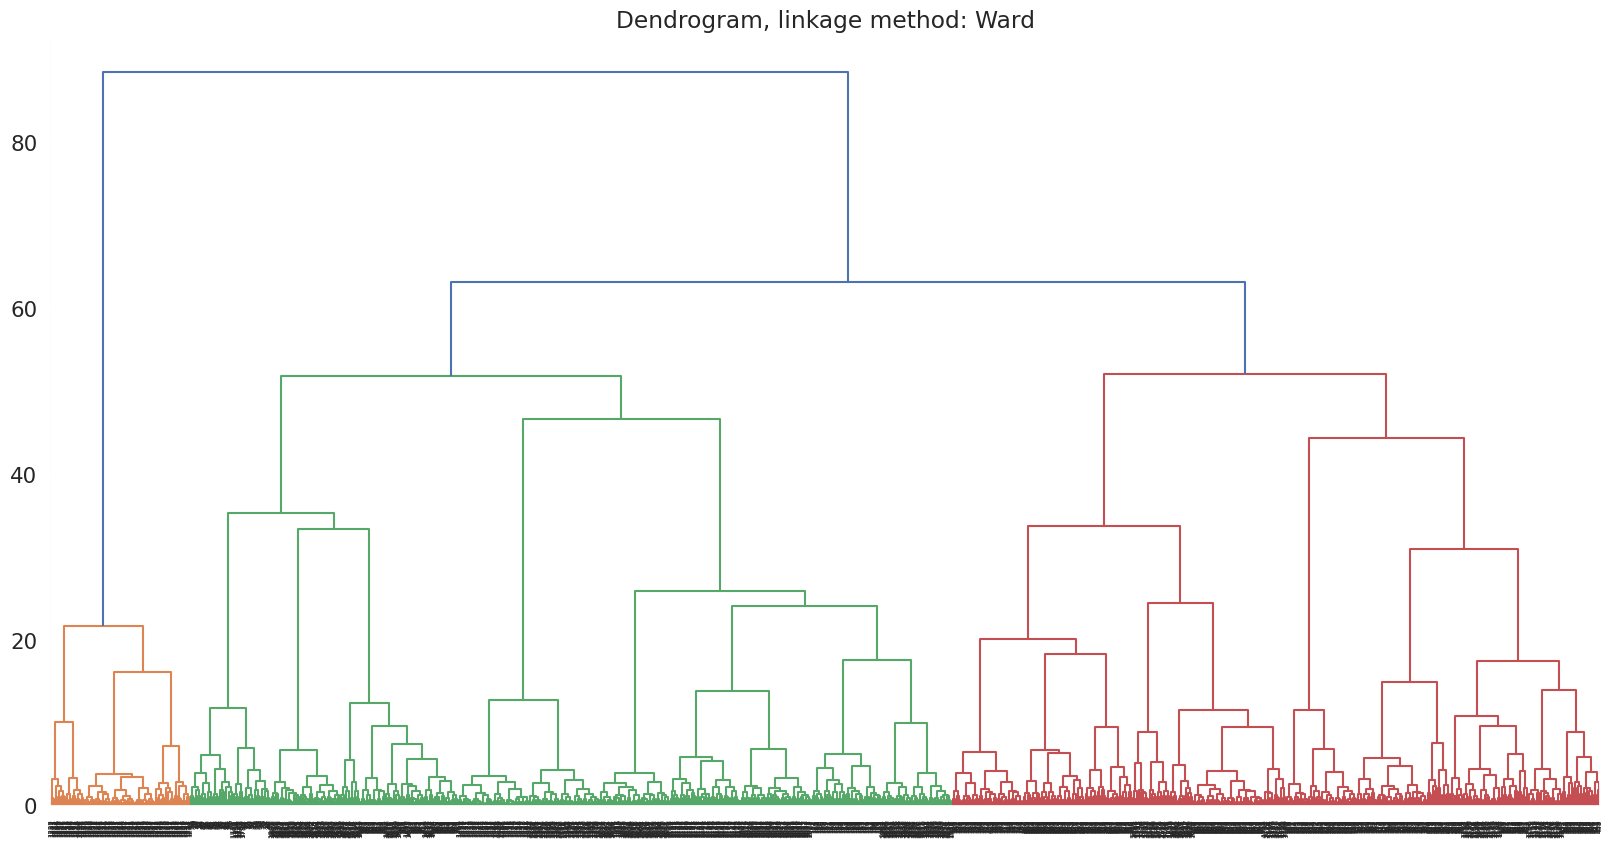

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram, linkage method: complete")
dendrogram(linkage(X_std, method='complete'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram, linkage method: average")
dendrogram(linkage(X_std, method='average'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram, linkage method: Ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()

Of the three linkage methods, the ward method seems visually most reasonable.

In [ ]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average",
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print('\n')
agg_avg = metrics.silhouette_score(X_std, clusters, metric='euclidean')

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete",
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print('\n')
agg_comp = metrics.silhouette_score(X_std, clusters, metric='euclidean')

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward",
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
agg_ward = metrics.silhouette_score(X_std, clusters, metric='euclidean')

Silhouette score of linkage method average: 0.17543925071834438


Silhouette score of linkage method complete: 0.18573039907357278


Silhouette score of linkage method ward: 0.3936922330626439


We can see here that the silhouette score is best for the ward linkage method, corresponding well with the visuals of the dendrogram.

In [ ]:
sil_scores['Agg_Avg_Method'] = agg_avg
sil_scores['Agg_Comp_Method'] = agg_comp
sil_scores['Agg_Ward_Method'] = agg_ward
print(sil_scores)

{'KMeans': 0.22684585725733183, 'Agg_Avg_Method': 0.17543925071834438, 'Agg_Comp_Method': 0.18573039907357278, 'Agg_Ward_Method': 0.3936922330626439}


## UMAP


In [ ]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

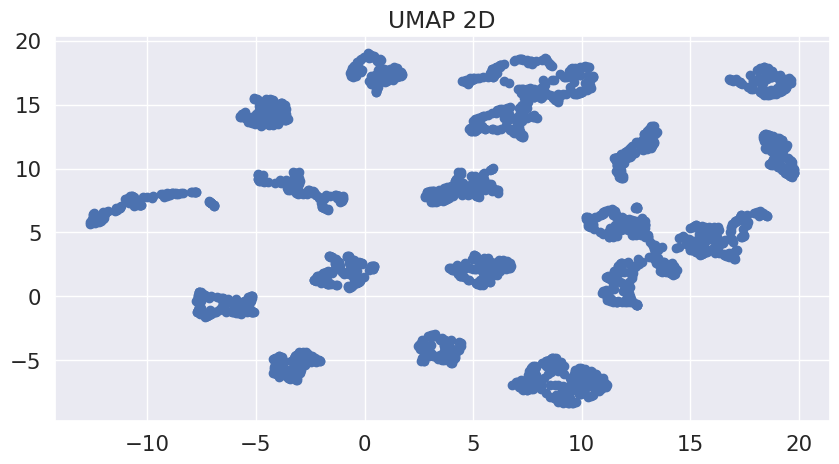

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.title('UMAP 2D')
plt.axis('on')
plt.show()

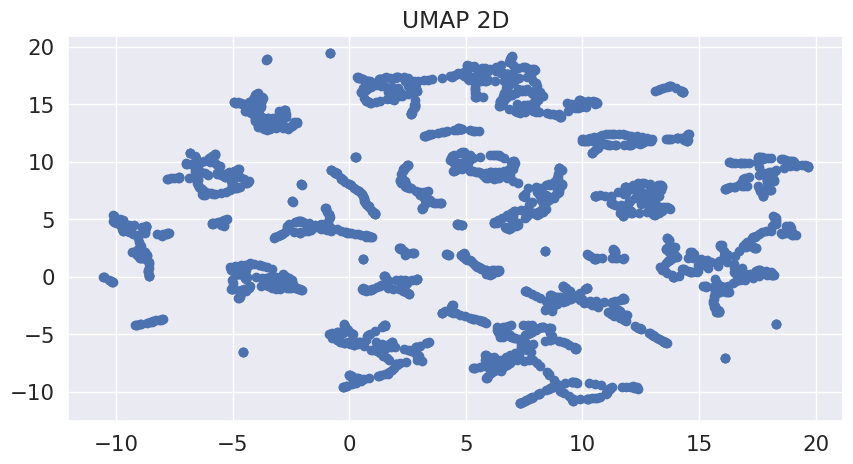

In [ ]:
umap_results2 = umap.UMAP(n_neighbors=3,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(umap_results2[:, 0], umap_results2[:, 1])
plt.title('UMAP 2D')
plt.axis('on')
plt.show()

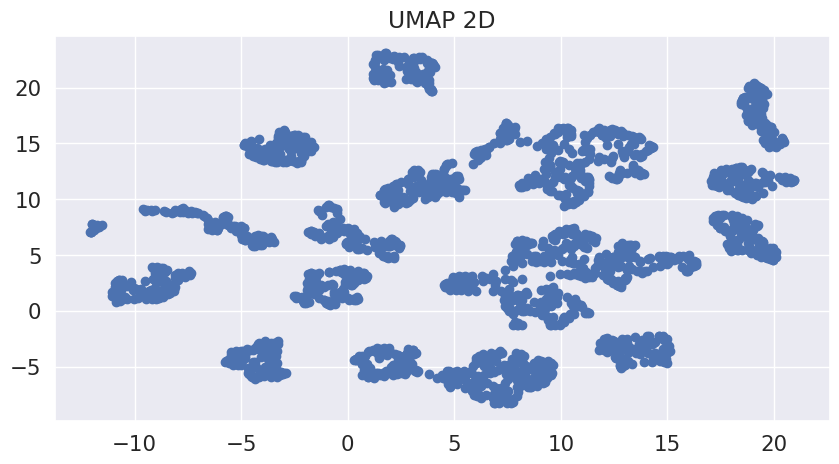

In [ ]:
umap_results4 = umap.UMAP(n_neighbors=5,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(umap_results4[:, 0], umap_results4[:, 1])
plt.title('UMAP 2D')
plt.axis('on')
plt.show()

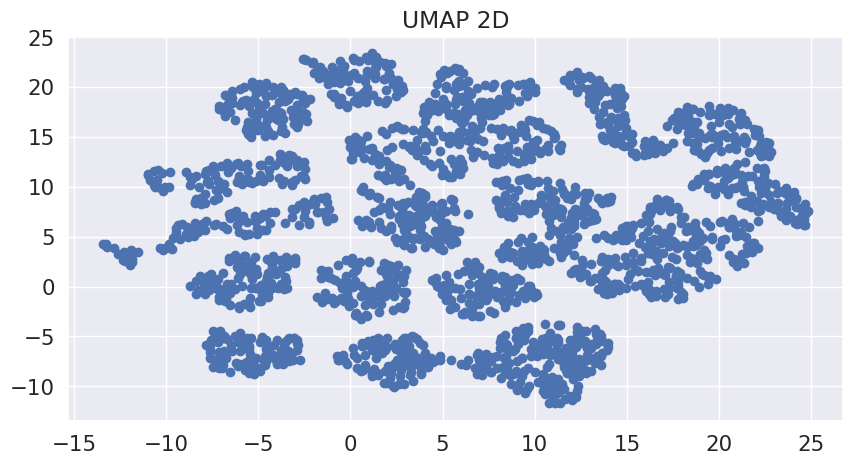

In [ ]:
umap_results5 = umap.UMAP(n_neighbors=5,
                      min_dist=1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(umap_results5[:, 0], umap_results5[:, 1])
plt.title('UMAP 2D')
plt.axis('on')
plt.show()

Unfortumately, adjusting the `'min_dist'` hyperparameter also did not yield better results.

In [ ]:
list(sil_scores.keys())
sil_scores

{'KMeans': 0.22684585725733183,
 'Agg_Avg_Method': 0.17543925071834438,
 'Agg_Comp_Method': 0.18573039907357278,
 'Agg_Ward_Method': 0.3936922330626439}

In [ ]:
model_eval=pd.DataFrame({'Model':list(sil_scores.keys()), 'Silhouette Score': [agg_kmeans,agg_avg, agg_comp, agg_ward]})
print(model_eval)

             Model  Silhouette Score
0           KMeans          0.226846
1   Agg_Avg_Method          0.175439
2  Agg_Comp_Method          0.185730
3  Agg_Ward_Method          0.393692


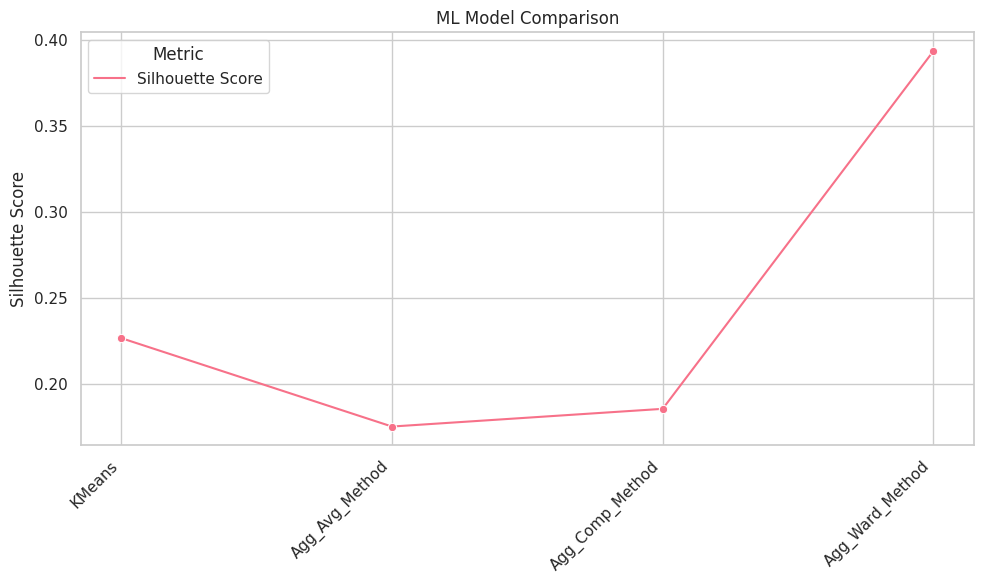

In [ ]:

# Melt the DataFrame for easier plotting
melted_df = model_eval.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.set(style="whitegrid", context="notebook")

# Create the line chart
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", 4)  # Choose a color palette
sns.lineplot(x='Model', y='Score', hue='Metric', data=melted_df, marker='o', palette=palette)
plt.xticks(rotation=45, ha='right')
plt.title('ML Model Comparison')
plt.xlabel('')
plt.ylabel('Silhouette Score')
plt.tight_layout()

plt.show()

**Conclusion**


In this case study we examined the crop dataset to determine a best unsupervised machine learning model for a crop recommendation system. The dataset was obtained from Kaggle and was previewed, cleaned, transformed, and standardized. We looked at three unsupervised models to determine the optimal model performance.

The Silhouette Score and visual observation were used to assess the effectiveness of each model and submodel. The initial visual observations for the Kmeans model showed very little effective clustering, this was also confirmed by its low Silhouette score. Next the Hierarchical Clustering method was tested. Within this method, three linkage methods were tested: average, complete, and ward. Of these the ward linkage method showed the most visually distinct clusters. This was also confirmed by its high Silhouette Score. Lastly, the UMAP method was also tested. Despite adjusting hyperparameters there were no distinct clusters visible.

Based on these observations, I would recommend the Hierarchical Clustering method with the ward linkage method as the unsupervised model for the crop recommendation system.